# Initialize Snowflake Session using FosforML

In [1]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [2]:
my_session.connection.database

'FDC_INSURANCE'

In [3]:
my_session.connection.schema

'INS_CLAIMS_RESERV_SCHEMA'

In [4]:
table_name = 'AUTO_INSURANCE_CLAIMS_DATA'

In [5]:
sf_df = my_session.sql("select * from {}".format(table_name))

In [6]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [7]:
df = sf_df.to_pandas()

In [8]:
type(df)

pandas.core.frame.DataFrame

### Pandas is a software library written for the Python programming language for data manipulation and analysis. 
### In particular, it offers data structures and operations for manipulating numerical tables and time series.

## Top 5 rows of the dataframe/Table

In [7]:
df.head(5)

,MONTHS_AS_CUSTOMER,CUSTOMER_AGE,POLICY_NUMBER,POLICY_BIND_DATE,POLICY_STATE,POLICY_CSL,POLICY_DEDUCTABLE,POLICY_ANNUAL_PREMIUM,UMBRELLA_LIMIT,INSURED_ZIP,...,POLICE_REPORT_AVAILABLE,TOTAL_CLAIM_AMOUNT_PAID,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM,AUTO_MAKE,AUTO_MODEL,AUTO_YEAR,FRAUD_REPORTED,POLICY_BIND_DATE_CUSTOM
0,139,37,457069,17-08-2011,CT,250/500,1351,1589,16139812,609322,...,No Police Report Available,48182,538,20189,27455,Dodge,Neon,2005,No Fraud Reported,2011-08-17
1,292,52,429086,27-09-2010,CT,100/300,2216,2669,15406514,438830,...,Police Report Available,64579,11170,5093,48316,Audi,A3,1999,No Fraud Reported,2010-09-27
2,45,20,457562,13-01-2002,CT,100/300,929,1290,5629268,616164,...,No Police Report Available,32420,538,845,31037,Mercedes,E400,2014,No Fraud Reported,2002-01-13
3,49,67,471692,07-02-2012,CT,500/1000,699,970,18501194,445120,...,No Police Report Available,53780,7280,898,45602,Suburu,Legacy,2005,No Fraud Reported,2012-02-07
4,128,45,463009,18-06-2008,CT,100/300,1122,1384,16890664,442936,...,Police Report Available,94511,412,14545,79554,Ford,Escape,2013,No Fraud Reported,2008-06-18


In [9]:
df.shape

(232025, 41)

## Data Basic information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232025 entries, 0 to 232024
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   MONTHS_AS_CUSTOMER           232025 non-null  int16 
 1   CUSTOMER_AGE                 232025 non-null  int8  
 2   POLICY_NUMBER                232025 non-null  object
 3   POLICY_BIND_DATE             232025 non-null  object
 4   POLICY_STATE                 232025 non-null  object
 5   POLICY_CSL                   232025 non-null  object
 6   POLICY_DEDUCTABLE            232025 non-null  int16 
 7   POLICY_ANNUAL_PREMIUM        232025 non-null  int16 
 8   UMBRELLA_LIMIT               232025 non-null  int32 
 9   INSURED_ZIP                  232025 non-null  object
 10  INSURED_SEX                  232025 non-null  object
 11  INSURED_EDUCATION_LEVEL      232025 non-null  object
 12  INSURED_OCCUPATION           232025 non-null  object
 13  INSURED_HOBBIE

## Data Description

In [11]:
df.describe()

,MONTHS_AS_CUSTOMER,CUSTOMER_AGE,POLICY_DEDUCTABLE,POLICY_ANNUAL_PREMIUM,UMBRELLA_LIMIT,CAPITAL_GAINS,CAPITAL_LOSS,NUMBER_OF_VEHICLES_INVOLVED,BODILY_INJURIES,WITNESSES,TOTAL_CLAIM_AMOUNT_PAID,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM
count,232025.000000,232025.000000,232025.000000,232025.000000,2.320250e+05,232025.000000,232025.00000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000,232025.000000
mean,126.727736,43.838483,1253.651365,1566.490792,1.040827e+07,47900.608447,-41154.24565,1.475707,0.996712,1.501437,67235.224006,7735.964607,8529.807297,50969.452102
std,91.088378,14.691610,535.036140,656.380264,5.916215e+06,27700.863866,23731.03404,0.701444,0.817630,1.115730,18857.753110,7150.694660,7865.621423,15683.462801
min,7.000000,19.000000,301.000000,430.000000,0.000000e+00,0.000000,-90200.00000,1.000000,0.000000,0.000000,21214.000000,300.000000,0.000000,20004.000000
25%,43.000000,31.000000,793.000000,996.000000,6.166324e+06,23826.000000,-61635.00000,1.000000,0.000000,1.000000,53423.000000,524.000000,1024.000000,37614.000000
50%,111.000000,44.000000,1250.000000,1569.000000,1.075463e+07,48076.000000,-41330.00000,1.000000,1.000000,2.000000,67742.000000,6062.000000,6209.000000,50927.000000
75%,197.000000,57.000000,1698.000000,2134.000000,1.537261e+07,71699.000000,-20555.00000,2.000000,2.000000,2.000000,81082.000000,14017.000000,15316.000000,64362.000000
max,326.000000,69.000000,2430.000000,2700.000000,1.999986e+07,96000.000000,0.00000,4.000000,2.000000,3.000000,121412.000000,21899.000000,26432.000000,81998.000000


In [12]:
df.columns

Index(['MONTHS_AS_CUSTOMER', 'CUSTOMER_AGE', 'POLICY_NUMBER',
       'POLICY_BIND_DATE', 'POLICY_STATE', 'POLICY_CSL', 'POLICY_DEDUCTABLE',
       'POLICY_ANNUAL_PREMIUM', 'UMBRELLA_LIMIT', 'INSURED_ZIP', 'INSURED_SEX',
       'INSURED_EDUCATION_LEVEL', 'INSURED_OCCUPATION', 'INSURED_HOBBIES',
       'INSURED_RELATIONSHIP', 'CAPITAL_GAINS', 'CAPITAL_LOSS',
       'INCIDENT_DATE', 'INCIDENT_TYPE', 'COLLISION_TYPE', 'INCIDENT_SEVERITY',
       'AUTHORITIES_CONTACTED', 'INCIDENT_STATE', 'INCIDENT_CITY',
       'INCIDENT_LOCATION', 'INCIDENT_HOUR_OF_THE_DAY', 'INCIDENT_TIME_OF_DAY',
       'NUMBER_OF_VEHICLES_INVOLVED', 'PROPERTY_DAMAGE', 'BODILY_INJURIES',
       'WITNESSES', 'POLICE_REPORT_AVAILABLE', 'TOTAL_CLAIM_AMOUNT_PAID',
       'INJURY_CLAIM', 'PROPERTY_CLAIM', 'VEHICLE_CLAIM', 'AUTO_MAKE',
       'AUTO_MODEL', 'AUTO_YEAR', 'FRAUD_REPORTED', 'POLICY_BIND_DATE_CUSTOM'],
      dtype='object')

## Moving to a Dummy Dataset for Feature Engineering and Model training

In [13]:
import pandas as pd

In [17]:
df = pd.read_csv("Housing.csv")

In [18]:
df.shape

(545, 13)

In [19]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [21]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [23]:
df.duplicated().sum()

0

### Correlation is a way to describe how two things are related to each other. 
### When two things are correlated, it means that changes in one thing are associated with changes in the other.
### For example, if you notice that when you study more, your grades get better, there’s a positive correlation between studying and grades. 
### On the other hand, if you see that when you watch more TV, your grades go down, there’s a negative correlation between TV watching and grades.

In [28]:
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [30]:
import matplotlib.pyplot as plt

<BarContainer object of 545 artists>

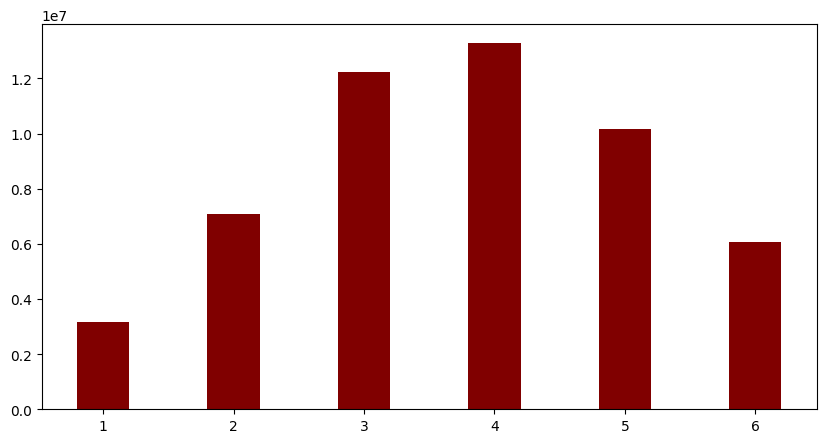

In [39]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df['bedrooms'], df['price'], color ='maroon', 
        width = 0.4)

AttributeError: PathCollection.set() got an unexpected keyword argument 'width'

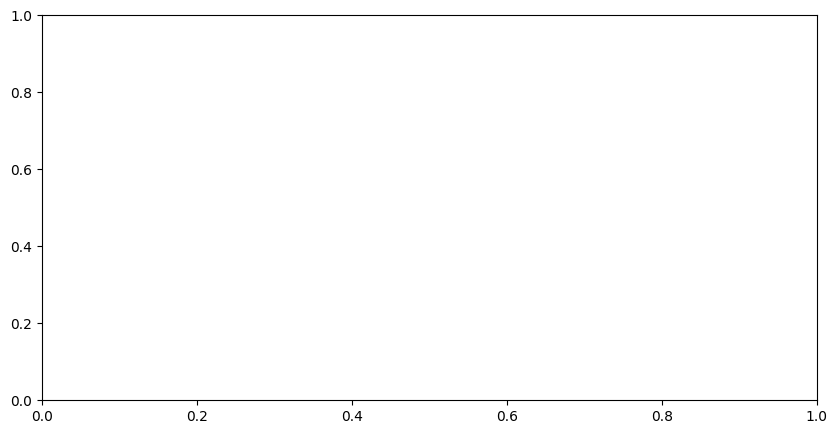

In [42]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.scatter(df['area'], df['price'], color ='maroon', 
        width = 0.4)